In [6]:
#Import the packages needed.
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

In [7]:
from torchvision.transforms import ToTensor

data_train = torchvision.datasets.MNIST('./data',
        download=True,train=True,transform=ToTensor())
data_test = torchvision.datasets.MNIST('./data',
        download=True,train=False,transform=ToTensor())

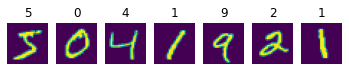

In [8]:
fig,ax = plt.subplots(1,7)
for i in range(7):
    ax[i].imshow(data_train[i][0].view(28,28))
    ax[i].set_title(data_train[i][1])
    ax[i].axis('off')

In [9]:
print('Training samples:',len(data_train))
print('Test samples:',len(data_test))

print('Tensor size:',data_train[0][0].size())
print('First 10 digits are:', [data_train[i][1] for i in range(10)])

Training samples: 60000
Test samples: 10000
Tensor size: torch.Size([1, 28, 28])
First 10 digits are: [5, 0, 4, 1, 9, 2, 1, 3, 1, 4]


In [10]:
print('Min intensity value: ',data_train[0][0].min().item())
print('Max intensity value: ',data_train[0][0].max().item())

Min intensity value:  0.0
Max intensity value:  1.0


In [11]:
# Create a dataloader to load the data in batches
batch_size = 100
train_loader = torch.utils.data.DataLoader(data_train,batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(data_test,batch_size=batch_size,shuffle=True)


In [12]:
# Define the model
class CNN(torch.nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1 = torch.nn.Conv2d(1,10,kernel_size=5)
        self.conv2 = torch.nn.Conv2d(10,20,kernel_size=5)
        self.conv2_drop = torch.nn.Dropout2d()
        self.fc1 = torch.nn.Linear(320,50)
        self.fc2 = torch.nn.Linear(50,10)

    def forward(self,x):
        x = torch.nn.functional.relu(self.conv1(x))
        x = torch.nn.functional.max_pool2d(x,2)
        x = torch.nn.functional.relu(self.conv2(x))
        x = torch.nn.functional.max_pool2d(x,2)
        x = x.view(-1,320)
        x = torch.nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x
        

In [14]:
# Create the model
model = CNN()

In [15]:
# fit the model
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)


In [16]:
# Define the loss function 
loss_fn = torch.nn.CrossEntropyLoss()


In [18]:
# matrices to store the loss and accuracy
loss_mat = np.zeros(len(train_loader))
acc_mat = np.zeros(len(train_loader))
print('Training the model...')
for i,(data,target) in enumerate(train_loader):
    data,target = data.to(torch.float),target.to(torch.long)
    output = model(data)
    loss = loss_fn(output,target)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_mat[i] = loss.item()
    acc_mat[i] = (output.argmax(dim=1)==target).sum().item()/target.shape[0]
    if i%100==0:
        print('Iteration:',i,'Loss:',loss.item())

Training the model...
Iteration: 0 Loss: 2.3126540184020996
Iteration: 100 Loss: 2.301692485809326
Iteration: 200 Loss: 2.293657064437866
Iteration: 300 Loss: 2.2412431240081787
Iteration: 400 Loss: 2.1289491653442383
Iteration: 500 Loss: 1.7005891799926758


In [20]:
# accuracy on test set
acc_test = np.zeros(len(test_loader))
for i,(data,target) in enumerate(test_loader):
    data,target = data.to(torch.float),target.to(torch.long)
    output = model(data)
    acc_test[i] = (output.argmax(dim=1)==target).sum().item()/target.shape[0]
    print('Test accuracy:',acc_test[i])

Test accuracy: 0.82
Test accuracy: 0.78
Test accuracy: 0.85
Test accuracy: 0.78
Test accuracy: 0.77
Test accuracy: 0.77
Test accuracy: 0.86
Test accuracy: 0.77
Test accuracy: 0.79
Test accuracy: 0.88
Test accuracy: 0.82
Test accuracy: 0.79
Test accuracy: 0.81
Test accuracy: 0.7
Test accuracy: 0.78
Test accuracy: 0.83
Test accuracy: 0.79
Test accuracy: 0.86
Test accuracy: 0.8
Test accuracy: 0.82
Test accuracy: 0.82
Test accuracy: 0.7
Test accuracy: 0.8
Test accuracy: 0.76
Test accuracy: 0.88
Test accuracy: 0.79
Test accuracy: 0.8
Test accuracy: 0.73
Test accuracy: 0.85
Test accuracy: 0.79
Test accuracy: 0.79
Test accuracy: 0.8
Test accuracy: 0.84
Test accuracy: 0.74
Test accuracy: 0.79
Test accuracy: 0.78
Test accuracy: 0.81
Test accuracy: 0.83
Test accuracy: 0.82
Test accuracy: 0.76
Test accuracy: 0.77
Test accuracy: 0.81
Test accuracy: 0.82
Test accuracy: 0.85
Test accuracy: 0.81
Test accuracy: 0.75
Test accuracy: 0.85
Test accuracy: 0.82
Test accuracy: 0.81
Test accuracy: 0.84
Test a

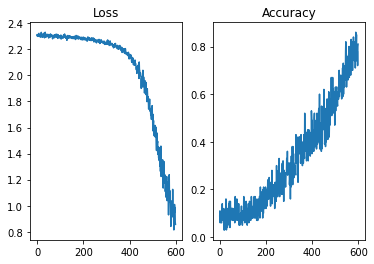

In [21]:
# Plot the loss and accuracy
fig,ax = plt.subplots(1,2)
ax[0].plot(loss_mat)
ax[0].set_title('Loss')
ax[1].plot(acc_mat)
ax[1].set_title('Accuracy')
plt.show()

Training the model with learning rate: 0.001
Iteration: 0 Loss: 2.3050026893615723
Iteration: 100 Loss: 2.314445734024048
Iteration: 200 Loss: 2.298309564590454
Iteration: 300 Loss: 2.3115100860595703
Iteration: 400 Loss: 2.3094871044158936
Iteration: 500 Loss: 2.3159639835357666
Test accuracy: 0.1
Test accuracy: 0.06
Test accuracy: 0.1
Test accuracy: 0.17
Test accuracy: 0.11
Test accuracy: 0.13
Test accuracy: 0.2
Test accuracy: 0.11
Test accuracy: 0.08
Test accuracy: 0.08
Test accuracy: 0.14
Test accuracy: 0.15
Test accuracy: 0.13
Test accuracy: 0.2
Test accuracy: 0.13
Test accuracy: 0.14
Test accuracy: 0.1
Test accuracy: 0.1
Test accuracy: 0.07
Test accuracy: 0.18
Test accuracy: 0.12
Test accuracy: 0.11
Test accuracy: 0.11
Test accuracy: 0.09
Test accuracy: 0.15
Test accuracy: 0.07
Test accuracy: 0.07
Test accuracy: 0.11
Test accuracy: 0.11
Test accuracy: 0.15
Test accuracy: 0.13
Test accuracy: 0.14
Test accuracy: 0.16
Test accuracy: 0.09
Test accuracy: 0.07
Test accuracy: 0.12
Test 

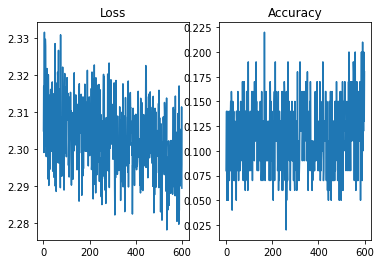

Training the model with learning rate: 0.01
Iteration: 0 Loss: 2.299961805343628
Iteration: 100 Loss: 2.3028526306152344
Iteration: 200 Loss: 2.290236473083496
Iteration: 300 Loss: 2.276911973953247
Iteration: 400 Loss: 2.254894733428955
Iteration: 500 Loss: 2.206373691558838
Test accuracy: 0.63
Test accuracy: 0.66
Test accuracy: 0.62
Test accuracy: 0.63
Test accuracy: 0.66
Test accuracy: 0.57
Test accuracy: 0.59
Test accuracy: 0.68
Test accuracy: 0.67
Test accuracy: 0.57
Test accuracy: 0.61
Test accuracy: 0.56
Test accuracy: 0.59
Test accuracy: 0.58
Test accuracy: 0.61
Test accuracy: 0.58
Test accuracy: 0.57
Test accuracy: 0.54
Test accuracy: 0.59
Test accuracy: 0.67
Test accuracy: 0.65
Test accuracy: 0.56
Test accuracy: 0.66
Test accuracy: 0.72
Test accuracy: 0.72
Test accuracy: 0.62
Test accuracy: 0.68
Test accuracy: 0.55
Test accuracy: 0.62
Test accuracy: 0.66
Test accuracy: 0.7
Test accuracy: 0.6
Test accuracy: 0.64
Test accuracy: 0.63
Test accuracy: 0.56
Test accuracy: 0.62
Test 

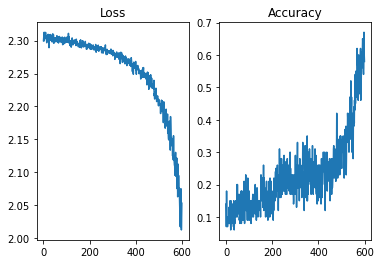

Training the model with learning rate: 0.1
Iteration: 0 Loss: 2.3002541065216064
Iteration: 100 Loss: 0.6471592783927917
Iteration: 200 Loss: 0.3656523525714874
Iteration: 300 Loss: 0.22922927141189575
Iteration: 400 Loss: 0.13881057500839233
Iteration: 500 Loss: 0.2613183856010437
Test accuracy: 0.98
Test accuracy: 1.0
Test accuracy: 0.97
Test accuracy: 0.97
Test accuracy: 0.96
Test accuracy: 0.99
Test accuracy: 0.98
Test accuracy: 0.99
Test accuracy: 0.98
Test accuracy: 0.99
Test accuracy: 0.98
Test accuracy: 0.98
Test accuracy: 1.0
Test accuracy: 0.96
Test accuracy: 0.95
Test accuracy: 0.97
Test accuracy: 0.97
Test accuracy: 0.99
Test accuracy: 0.96
Test accuracy: 0.96
Test accuracy: 0.94
Test accuracy: 0.96
Test accuracy: 0.98
Test accuracy: 0.99
Test accuracy: 0.98
Test accuracy: 0.95
Test accuracy: 0.98
Test accuracy: 0.98
Test accuracy: 0.93
Test accuracy: 0.94
Test accuracy: 0.97
Test accuracy: 0.98
Test accuracy: 0.98
Test accuracy: 0.97
Test accuracy: 0.97
Test accuracy: 0.99

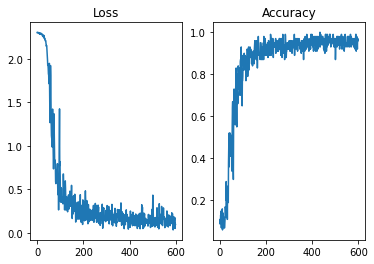

Training the model with learning rate: 1
Iteration: 0 Loss: 2.2997286319732666
Iteration: 100 Loss: 2.3063466548919678
Iteration: 200 Loss: 2.2931647300720215
Iteration: 300 Loss: 2.3080360889434814
Iteration: 400 Loss: 2.297020196914673
Iteration: 500 Loss: 2.299793004989624
Test accuracy: 0.08
Test accuracy: 0.16
Test accuracy: 0.08
Test accuracy: 0.11
Test accuracy: 0.17
Test accuracy: 0.07
Test accuracy: 0.11
Test accuracy: 0.04
Test accuracy: 0.1
Test accuracy: 0.11
Test accuracy: 0.08
Test accuracy: 0.1
Test accuracy: 0.15
Test accuracy: 0.14
Test accuracy: 0.09
Test accuracy: 0.08
Test accuracy: 0.11
Test accuracy: 0.12
Test accuracy: 0.06
Test accuracy: 0.08
Test accuracy: 0.07
Test accuracy: 0.11
Test accuracy: 0.11
Test accuracy: 0.09
Test accuracy: 0.04
Test accuracy: 0.08
Test accuracy: 0.13
Test accuracy: 0.12
Test accuracy: 0.13
Test accuracy: 0.08
Test accuracy: 0.1
Test accuracy: 0.13
Test accuracy: 0.07
Test accuracy: 0.09
Test accuracy: 0.12
Test accuracy: 0.11
Test a

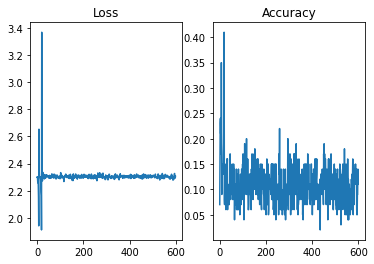

In [22]:
# grid search
learning_rates = [0.001,0.01,0.1,1]
for lr in learning_rates:
    model = CNN()
    optimizer = torch.optim.SGD(model.parameters(),lr=lr)
    loss_fn = torch.nn.CrossEntropyLoss()
    loss_mat = np.zeros(len(train_loader))
    acc_mat = np.zeros(len(train_loader))
    print('Training the model with learning rate:',lr)
    for i,(data,target) in enumerate(train_loader):
        data,target = data.to(torch.float),target.to(torch.long)
        output = model(data)
        loss = loss_fn(output,target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_mat[i] = loss.item()
        acc_mat[i] = (output.argmax(dim=1)==target).sum().item()/target.shape[0]
        if i%100==0:
            print('Iteration:',i,'Loss:',loss.item())
    acc_test = np.zeros(len(test_loader))
    for i,(data,target) in enumerate(test_loader):
        data,target = data.to(torch.float),target.to(torch.long)
        output = model(data)
        acc_test[i] = (output.argmax(dim=1)==target).sum().item()/target.shape[0]
        print('Test accuracy:',acc_test[i])
    fig,ax = plt.subplots(1,2)
    ax[0].plot(loss_mat)
    ax[0].set_title('Loss')
    ax[1].plot(acc_mat)
    ax[1].set_title('Accuracy')
    plt.show() 

In [27]:
# faire un test avec le model
test_data = data_test[0][0].view(1,1,28,28)
test_data = test_data.to(torch.float)
output = model(test_data)
print('Predicted digit:',output.argmax(dim=1).item())
print('Actual digit:',data_test[0][1])
print('Prediction:',torch.nn.functional.softmax(output,dim=1))

Predicted digit: 7
Actual digit: 7
Prediction: tensor([[0.1049, 0.1071, 0.0996, 0.1076, 0.0924, 0.0896, 0.0976, 0.1175, 0.0830,
         0.1007]], grad_fn=<SoftmaxBackward0>)
